## Phylostan: Sanity Check

#### Simulation

- A tree with constant population size of $N_0$ from the present till time 0.1 * $4N_0$ and afterwards population size 0.01 * $4N_0$ was generated using the following command:

$\texttt{mspms 100 1 -T --size-change 0.05 0.01 | tail -1 > sanity.tree}$

- We use the Newick file generated as input into seq-gen simulating evolution under the HKY model as follows:

$\texttt{seq-gen -mHKY -on sanity.tree > sanity.nexus}$

#### Check

We analyze the tree and sequence data using Phylostan under the following model

1. Mutation model: HKY
2. Tree prior: Skyride
3. Frequencies and relative rate: Dirichlet Priors
4. Variational Distribution: Mean field

Sample size 10000

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Bio import Phylo

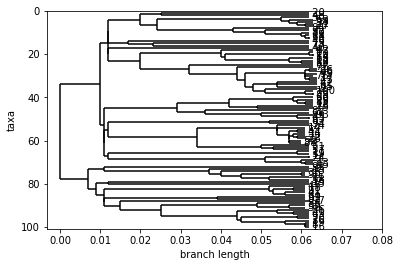

In [3]:
tree = Phylo.read('data/sanity.tree', 'newick')
Phylo.draw(tree)

In [7]:
seeds = [1,2,3,4,6,8,9,10,11,12]
stem = 'output/run1/'
n = len(seeds)
E = 99 #number of coalescence events
m = 10000 #posterior sample size
heights = np.empty((n,E,m+1))
log_N = np.empty((n,E,m+1))
rates = np.empty((n,m+1))

for i in range(n):
    seed = seeds[i]
    with open(f'{stem}sanity_{seed}') as fp:
        data = []
        for line in fp:
            line = line.strip()
            if line.startswith('lp'):
                header = line.split(',')
                [data.append([]) for _ in range(len(header))]
            elif not line.startswith('#') and len(line) != 0:
                for idx, h in enumerate(line.split(',')):
                    data[idx].append(float(h))

        def parse_helper(var):
            d = []
            if f'{var}.1' in header:
                for h in header:
                    if h.startswith(f'{var}.'):
                        d.append(data[header.index(h)])
            return d
        heights[i] = np.array(parse_helper('heights'))
        log_N[i] = np.array(parse_helper('thetas'))
        rates[i] = data[header.index('rate')]

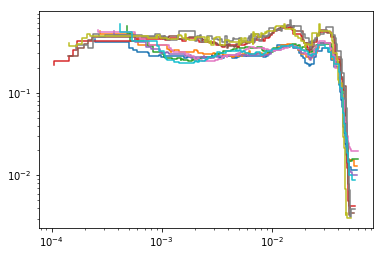

In [8]:
N = np.exp(log_N)
med_heights = np.median(heights, axis=2)
y = np.median(N, axis=2)
scale = np.median(rates, axis=1)
for i in range(n):
    x = med_heights[i]
    inds = np.argsort(med_heights[i])
    _ = plt.plot(x[inds] * scale[i], y[i] * scale[i], drawstyle='steps-pre')
    plt.xscale('log')
    plt.yscale('log')
plt.savefig('scaled.png')

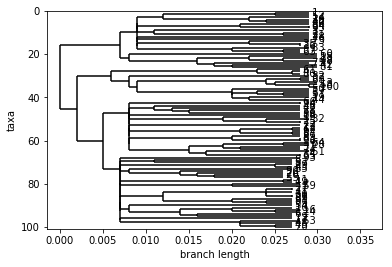

In [3]:
tree = Phylo.read('data/sanity2.tree', 'newick')
Phylo.draw(tree)

In [11]:
seeds = [1,2,3,4,5,6,8,9,11,12]
epi = 'sanity2'
stem = 'output/run2/'
n = len(seeds)
E = 99 #number of coalescence events
m = 10000 #posterior sample size
heights = np.empty((n,E,m+1))
log_N = np.empty((n,E,m+1))
rates = np.empty((n,m+1))

for i in range(n):
    seed = seeds[i]
    with open(f'{stem}{epi}_{seed}') as fp:
        data = []
        for line in fp:
            line = line.strip()
            if line.startswith('lp'):
                header = line.split(',')
                [data.append([]) for _ in range(len(header))]
            elif not line.startswith('#') and len(line) != 0:
                for idx, h in enumerate(line.split(',')):
                    data[idx].append(float(h))

        def parse_helper(var):
            d = []
            if f'{var}.1' in header:
                for h in header:
                    if h.startswith(f'{var}.'):
                        d.append(data[header.index(h)])
            return d
        heights[i] = np.array(parse_helper('heights'))
        log_N[i] = np.array(parse_helper('thetas'))
        rates[i] = data[header.index('rate')]

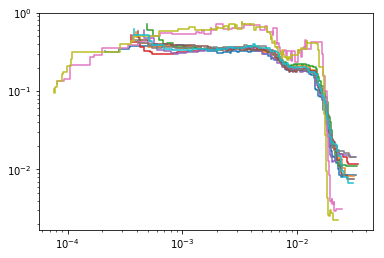

In [12]:
N = np.exp(log_N)
med_heights = np.median(heights, axis=2)
y = np.median(N, axis=2)
scale = np.median(rates, axis=1)
for i in range(n):
    x = med_heights[i]
    inds = np.argsort(med_heights[i])
    _ = plt.plot(x[inds] * scale[i], y[i] * scale[i], drawstyle='steps-pre')
    plt.xscale('log')
    plt.yscale('log')
plt.savefig('scaled.png')